In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
import sys
root_path = '/content/gdrive/My Drive/Code/santa-workshop-tour-2019/'
sys.path.append(root_path)

In [1]:
import numpy as np

from initializations import initialise_population
from genetic_algoritms.selections import tournament
from genetic_algoritms.crossovers import gap_crossovers
from genetic_algoritms.mutations import gap_mutations
from genetic_algoritms.nsgaII.selection import environment_selection
from metrics import computes_occ_acc_costs

In [5]:
N = 300
N_GENERATIONS = 5000
UNIFORM_CROSSOVER_RATE = 0.5
SELECTION_RATE = 0.5
MUTATION_RATE = 1
RANDOM_FAMILY_RATE = 0.1
RANDOM_CHOICE_RATE = 0.2
STEP_MUTATION_RATE = 0.5
N_OPPONENTS = 2

population = np.load('data/population_nsga.npy', allow_pickle=True)
# # population = initialise_population(N)
offsprings = []

In [6]:
for n in range(N_GENERATIONS):
    combined_population = np.array(population.tolist() + offsprings)
    occ_costs, acc_costs = computes_occ_acc_costs(combined_population)
    costs_array = np.vstack([occ_costs.sum(axis=1), acc_costs.sum(axis=1)]).T
    print(
        f'Generation {n}: \n min_occ_cost: {np.min(costs_array[:, 0])}' +
        f' - min_acc_cost: {np.min(costs_array[:, 1])}' +
        f' - median_occ_cost: {np.median(costs_array[:, 0])}' +
        f' - median_acc_cost: {np.median(costs_array[:, 1])}'
    )
    if n % 20 == 0:
        print('Saving population')
        np.save('data/population_nsga.npy',
                population, allow_pickle=True)
    # Non dominated sorting
    population, ranks, crowd_dis = environment_selection(
        combined_population, costs_array, N, SELECTION_RATE,
    )
    # Genetic operations
    fit = np.vstack([ranks, crowd_dis]).T
    parents_idx = tournament(N, N_OPPONENTS, fit)
    parents = population[parents_idx].copy()
    offsprings = gap_crossovers(parents, UNIFORM_CROSSOVER_RATE)
    del offsprings[-1]
    offsprings = np.vstack(offsprings)
    occ_costs, acc_costs = computes_occ_acc_costs(offsprings)
    offsprings = gap_mutations(offsprings, MUTATION_RATE,
                               RANDOM_FAMILY_RATE,
                               RANDOM_CHOICE_RATE,
                               STEP_MUTATION_RATE,
                               occ_costs, acc_costs).tolist()

Generation 0: 
 min_occ_cost: 226080.0 - min_acc_cost: 5284.592172581509 - median_occ_cost: 226338.0 - median_acc_cost: 5539.455259275397
Saving population
Generation 1: 
 min_occ_cost: 226175.0 - min_acc_cost: 5245.800835310828 - median_occ_cost: 226706.0 - median_acc_cost: 5547.042311567085
Generation 2: 
 min_occ_cost: 226162.0 - min_acc_cost: 5260.180275293951 - median_occ_cost: 226448.0 - median_acc_cost: 5541.930939526329
Generation 3: 
 min_occ_cost: 226071.0 - min_acc_cost: 5284.592172581509 - median_occ_cost: 226420.0 - median_acc_cost: 5546.378316022899
Generation 4: 
 min_occ_cost: 226080.0 - min_acc_cost: 5256.1119127893735 - median_occ_cost: 226402.0 - median_acc_cost: 5544.960359684857
Generation 5: 
 min_occ_cost: 226148.0 - min_acc_cost: 5258.718875031825 - median_occ_cost: 226398.0 - median_acc_cost: 5540.243674175074
Generation 6: 
 min_occ_cost: 226130.0 - min_acc_cost: 5264.505783881231 - median_occ_cost: 226398.0 - median_acc_cost: 5538.0638370410825
Generation 7: 

KeyboardInterrupt: 

In [0]:

# population, front_no, crowd_dis = environment_selection(
#     combined_population, costs_array, N, SELECTION_RATE
# )
# # Genetic operations
# fit = np.vstack((front_no, crowd_dis)).T
# parents_idx = tournament(N, N_OPPONENTS, fit)
# parents = population[parents_idx].copy()
offsprings = gap_crossovers(parents, UNIFORM_CROSSOVER_RATE)
del offsprings[-1]
offsprings = np.vstack(offsprings)
occ_costs, acc_costs = computes_occ_acc_costs(offsprings)
offsprings = gap_mutations(offsprings, MUTATION_RATE,
                            RANDOM_FAMILY_RATE,
                            RANDOM_CHOICE_RATE,
                            STEP_MUTATION_RATE,
                            occ_costs, acc_costs).tolist()

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

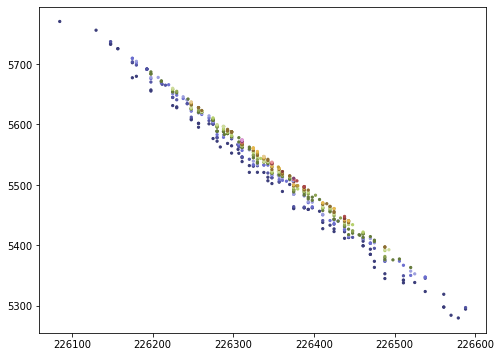

In [84]:
combined_population = np.array(population.tolist() + offsprings)
occ_costs, acc_costs = computes_occ_acc_costs(combined_population)
costs_array = np.vstack([occ_costs.sum(axis=1), acc_costs.sum(axis=1)]).T
population, ranks, crowd_dis = environment_selection(
    combined_population, costs_array, N, SELECTION_RATE,
)
occ_costs, acc_costs = computes_occ_acc_costs(population)
costs_array = np.vstack([occ_costs.sum(axis=1), acc_costs.sum(axis=1)]).T
plt.figure(figsize=(8, 6))
plt.scatter(costs_array[:, 0], costs_array[:, 1], c=ranks, s=5, cmap='tab20b')

In [0]:
np.save('/content/gdrive/My Drive/Code/santa-workshop-tour-2019/data/population_nsga_checkpoint.npy', population)

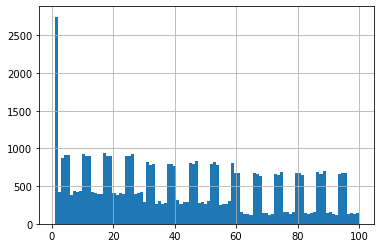

In [0]:
pd.Series(data_array[:,:].flatten()).hist(bins=100)

In [12]:
offsprings.shape

(301, 5000)

In [16]:
len(combined_population)

8604